This notebook searches through the motor database of ThrustCurve.org and allows the user to perform custom searches. 

In [1]:
import requests
import xmltodict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# a little helper function to search for motors by impulse class
def get_motors_of_class(c):
    xml = f"""<search-request>
    <impulse-class>{c}</impulse-class>
    <max-results>200</max-results>
</search-request>"""
    
    url = 'http://www.thrustcurve.org/servlets/search'
    
    response = requests.post(url, data=xml)
    
    mydict = xmltodict.parse(response.text)
    
    num_of_matches = int(mydict['search-response']['criteria']['matches'])
    
    motors = mydict['search-response']['results']['result']
    
    if num_of_matches != len(motors):
        print(f'Class: {c}: {num_of_matches} but only {len(motors)} returned')
    else:
        print(f'Class: {c}: {num_of_matches} found!')
        
    return motors

In [3]:
# specify which classes to search for.
classes = ['A','B','C','D','E','F','G','H','I',"J","K","L","M","N","O"]


# loop through and append to a dataframe that stores all the motors
df = pd.DataFrame()
for c in classes:
    motors = get_motors_of_class(c)
    for motor in motors:
        try:
            df = df.append(motor,ignore_index=True)
        except:
            pass
        
# convert to numeric types, if possible
df=df.apply(pd.to_numeric, errors='ignore')

Class: A: 16 found!
Class: B: 8 found!
Class: C: 10 found!
Class: D: 16 found!
Class: E: 23 found!
Class: F: 56 found!
Class: G: 90 found!
Class: H: 109 found!
Class: I: 138 found!
Class: J: 172 found!
Class: K: 162 found!
Class: L: 113 found!
Class: M: 119 found!
Class: N: 33 found!
Class: O: 12 found!


In [4]:
df

,availability,avg-thrust-n,brand-name,burn-time-s,cert-org,common-name,data-files,delays,designation,diameter,...,max-thrust-n,motor-id,prop-info,prop-weight-g,tot-impulse-ns,total-weight-g,type,updated-on,case-info,sparky
0,regular,0.2840,Micro Maxx II,0.772,National Association of Rocketry,Micro Maxx,3,1,Micro Maxx II,6.0,...,2.1080,1,black powder,0.50,0.2180,1.00,SU,2019-04-16,NaN,NaN
1,OOP,0.1630,Micro Maxx,0.827,National Association of Rocketry,Micro Maxx,2,1,Micro Maxx,6.0,...,1.8980,2,black powder,0.40,0.1350,1.07,SU,2019-04-16,NaN,NaN
2,OOP,2.4800,1/4A2,0.230,National Association of Rocketry,1/4A2,2,"2,4",1/4A2,10.5,...,5.4000,3,NaN,0.75,0.5700,NaN,SU,2019-04-16,NaN,NaN
3,regular,2.3600,1/4A3,0.250,National Association of Rocketry,1/4A3,2,3,1/4A3,13.0,...,4.9500,4,black powder,0.83,0.5900,6.10,SU,2019-10-05,NaN,NaN
4,OOP,1.9400,1/2A2,0.630,National Association of Rocketry,1/2A2,2,"2,4,6",1/2A2,10.5,...,3.9700,5,NaN,1.50,1.2200,NaN,SU,2019-04-16,NaN,NaN
5,regular,3.0300,1/2A3,0.360,National Association of Rocketry,1/2A3,2,"2,4",1/2A3,13.0,...,7.6200,6,black powder,2.00,1.0900,6.60,SU,2019-10-05,NaN,NaN
6,regular,3.4200,1/2A6,0.330,National Association of Rocketry,1/2A6,2,2,1/2A6,18.0,...,7.8600,7,black powder,2.60,1.1300,NaN,SU,2019-04-16,NaN,NaN
7,OOP,1.8900,A2,1.310,National Association of Rocketry,A2,2,"0,3,5,7",A2,10.5,...,4.8200,8,NaN,3.00,2.4700,NaN,SU,2019-04-16,NaN,NaN
8,regular,2.2000,A3,1.010,National Association of Rocketry,A3,2,4,A3,13.0,...,5.8300,9,black powder,3.30,2.5000,8.50,SU,2019-10-05,NaN,NaN
9,regular,4.1600,A6,0.550,National Association of Rocketry,A6,2,4,A6,18.0,...,10.0700,10,black powder,3.50,2.3000,12.00,SU,2019-04-16,NaN,NaN


In [5]:
df.columns

Index(['availability', 'avg-thrust-n', 'brand-name', 'burn-time-s', 'cert-org',
       'common-name', 'data-files', 'delays', 'designation', 'diameter',
       'impulse-class', 'info-url', 'length', 'manufacturer',
       'manufacturer-abbrev', 'max-thrust-n', 'motor-id', 'prop-info',
       'prop-weight-g', 'tot-impulse-ns', 'total-weight-g', 'type',
       'updated-on', 'case-info', 'sparky'],
      dtype='object')

In [6]:
filter_list = ['H', 'I']
HI_motors = df[df['impulse-class'].isin(filter_list)]

In [7]:
HI_motors.head()

,availability,avg-thrust-n,brand-name,burn-time-s,cert-org,common-name,data-files,delays,designation,diameter,...,max-thrust-n,motor-id,prop-info,prop-weight-g,tot-impulse-ns,total-weight-g,type,updated-on,case-info,sparky
219,OOP,45.0,H45W,6.00,"Tripoli Rocketry Association, Inc.",H45,4,"10,15",H45W,38.0,...,102.00,115,White Lightning,197.4,289.0,294.784,SU,2019-04-16,SU 38x194,NaN
220,OOP,48.0,H48,4.40,"Tripoli Rocketry Association, Inc.",H48,2,"8,P",H48,38.0,...,101.00,116,NaN,145.0,249.0,292.000,SU,2019-04-16,SU 38x172,NaN
221,OOP,50.0,H50,5.00,"Tripoli Rocketry Association, Inc.",H50,2,"6,10",H50,29.0,...,109.00,117,NaN,142.0,264.0,NaN,SU,2019-04-16,SU 29x279,NaN
222,OOP,55.0,H55W,2.45,"Tripoli Rocketry Association, Inc.",H55,4,"6,10,14",H55W,29.0,...,113.30,118,White Lightning,99.7,162.3,188.160,SU,2019-04-16,SU 29x191,NaN
223,regular,70.0,H70,3.60,"Tripoli Rocketry Association, Inc.",H70,3,NaN,H70,29.0,...,204.25,119,NaN,145.2,207.5,352.000,hybrid,2019-04-16,29 h 136cc,NaN


In [8]:
# you can see how many motors it found
len(HI_motors)

246

In [9]:
# if we keep the important parameters
summary_cols = ['avg-thrust-n', 'max-thrust-n', "tot-impulse-ns",'burn-time-s','diameter', 'length']
summary = HI_motors[summary_cols]


In [10]:
summary.describe()

,avg-thrust-n,max-thrust-n,tot-impulse-ns,burn-time-s,diameter,length
count,246.000000,204.000000,246.000000,246.000000,246.000000,246.000000
mean,242.083098,390.194442,370.270130,2.052999,37.012195,331.158130
std,162.901055,456.245744,139.966234,1.434570,6.927309,180.206691
min,42.200000,63.700000,160.800000,0.316000,24.000000,69.000000
25%,135.325000,191.975000,247.000000,1.200000,29.000000,203.000000
50%,211.000000,293.000000,352.000000,1.715000,38.000000,290.000000
75%,296.540000,454.515000,490.832500,2.311951,38.000000,368.000000
max,1335.000000,5808.000000,640.000000,9.000000,54.000000,992.000000


In [11]:
cess_HI_motors = HI_motors[HI_motors['manufacturer-abbrev']=='Cesaroni']

In [12]:
cess_HI_motors_38mm = cess_HI_motors[cess_HI_motors['diameter']==38.0]

In [13]:
cess_HI_motors_38mm.describe()

,avg-thrust-n,burn-time-s,data-files,diameter,length,max-thrust-n,motor-id,prop-weight-g,tot-impulse-ns,total-weight-g
count,35.000000,35.000000,35.000000,35.0,35.000000,33.000000,35.000000,34.000000,35.000000,32.000000
mean,264.655714,1.994291,1.885714,38.0,259.657143,308.818485,529.228571,220.055882,411.616571,429.782875
std,161.897271,1.206635,0.718308,0.0,61.467803,172.611703,275.453219,74.575246,126.707251,124.674440
min,55.200000,0.520000,1.000000,38.0,185.000000,94.500000,133.000000,122.400000,232.400000,193.000000
25%,152.705000,1.705000,1.500000,38.0,186.000000,197.900000,205.000000,157.050000,286.000000,326.575000
50%,223.390000,1.880000,2.000000,38.0,245.000000,260.600000,566.000000,205.500000,394.600000,409.600000
75%,324.125000,2.150000,2.000000,38.0,302.500000,379.500000,715.500000,271.800000,527.460000,500.888000
max,805.300000,7.510000,4.000000,38.0,367.000000,932.500000,1045.000000,413.500000,636.100000,782.000000


In [14]:
cess_HI_motors_38mm.describe()

,avg-thrust-n,burn-time-s,data-files,diameter,length,max-thrust-n,motor-id,prop-weight-g,tot-impulse-ns,total-weight-g
count,35.000000,35.000000,35.000000,35.0,35.000000,33.000000,35.000000,34.000000,35.000000,32.000000
mean,264.655714,1.994291,1.885714,38.0,259.657143,308.818485,529.228571,220.055882,411.616571,429.782875
std,161.897271,1.206635,0.718308,0.0,61.467803,172.611703,275.453219,74.575246,126.707251,124.674440
min,55.200000,0.520000,1.000000,38.0,185.000000,94.500000,133.000000,122.400000,232.400000,193.000000
25%,152.705000,1.705000,1.500000,38.0,186.000000,197.900000,205.000000,157.050000,286.000000,326.575000
50%,223.390000,1.880000,2.000000,38.0,245.000000,260.600000,566.000000,205.500000,394.600000,409.600000
75%,324.125000,2.150000,2.000000,38.0,302.500000,379.500000,715.500000,271.800000,527.460000,500.888000
max,805.300000,7.510000,4.000000,38.0,367.000000,932.500000,1045.000000,413.500000,636.100000,782.000000


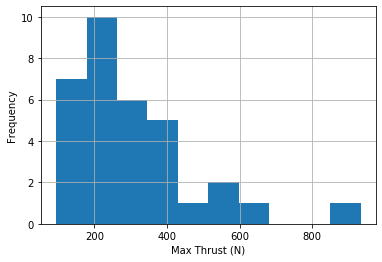

In [15]:
cess_HI_motors_38mm['max-thrust-n'].hist()
plt.xlabel('Max Thrust (N)')
plt.ylabel('Frequency')
plt.savefig('../design_documentation/figs/Max_Thrust_Distribution.eps')

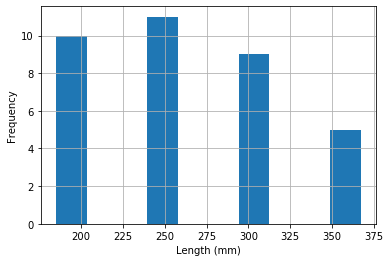

In [16]:
cess_HI_motors_38mm['length'].hist()
plt.xlabel('Length (mm)')
plt.ylabel('Frequency')
plt.savefig('../design_documentation/figs/Length_Distribution.eps')

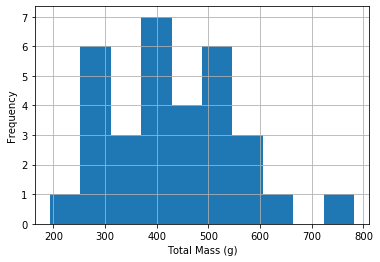

In [17]:
cess_HI_motors_38mm['total-weight-g'].hist()
plt.xlabel('Total Mass (g)')
plt.ylabel('Frequency')
plt.savefig('../design_documentation/figs/total_weight_Distribution.eps')

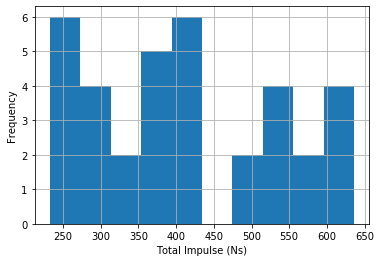

In [18]:
cess_HI_motors_38mm['tot-impulse-ns'].hist()
plt.xlabel('Total Impulse (Ns)')
plt.ylabel('Frequency')
plt.savefig('../design_documentation/figs/total_impulse_Distribution.eps')